Choose one of the following methods for classification model evaluation. 

Describe the details of the approach and write the code for applying it for the evaluation of both SVM and decision tree learning algorithms in Python using Sklearn and your choice of data. 

1) Holdout – 
2) Random subsampling – Repeated holdout 

3) Cross validation – Partition data into k disjoint subsets – k-fold: train on k-1 partitions, test on the remaining one – Leave-one-out: k=n 

4) Stratified sampling – oversampling vs undersampling 

5) Bootstrap – Sampling with replacement

### Import libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

HR Analytics Data Set

https://www.kaggle.com/ckeller/hra-modeling-with-decision-tree/notebook

Why are our best and most experienced employees leaving prematurely?

try to predict which valuable employees will leave next. 

Fields in the dataset include:

- Satisfaction Level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Departments (column sales)
- Salary
- Whether the employee has left

In [62]:
hra = pd.read_csv("/Users/racheldyap/Desktop/BTS 1st Semester/CDA/Homework:Exercises/HR_comma_sep.csv")
hra.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


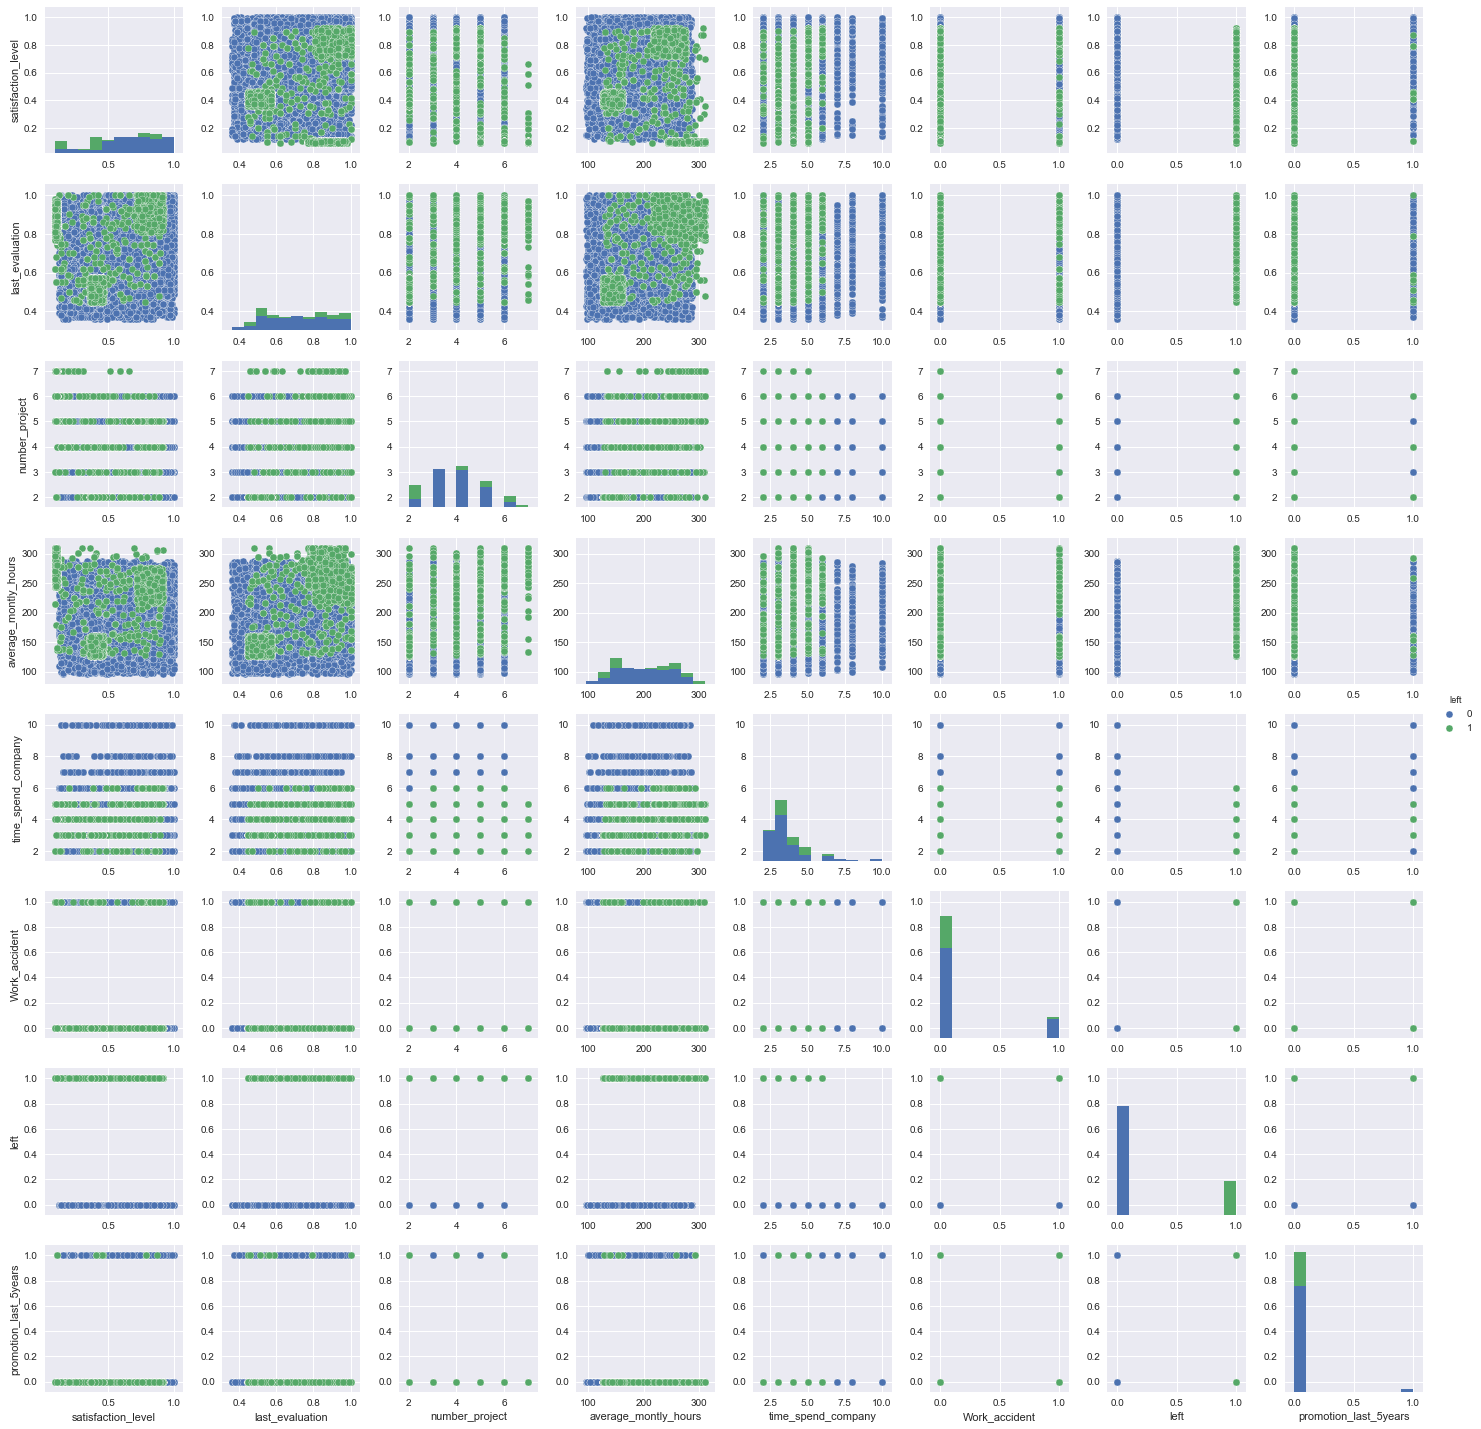

In [63]:
sns.pairplot(hra, hue="left")

In [5]:
hra.shape

(14999, 10)

#### Pre-Process Data

In [6]:
hra.rename(columns={"sales":"department"}, inplace=True)
hra_new = pd.get_dummies(hra,["department", "salary"],drop_first= True)
hra_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [39]:
hra_new.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [7]:
hra_new.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.052470,0.051137,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345,0.487766,0.429762
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.222981,0.220284,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317,0.499867,0.495059
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1 Hold Out

Reserve 2/3 for training and 1/3 for testing 
Issues: 
- waste of dataset
- estimation of error rate might be misleading

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC

In [9]:
X = hra_new.drop('left',axis=1)
y = hra_new["left"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#### SVC

In [11]:
model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[3295  136]
 [  76  993]]
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      3431
          1       0.88      0.93      0.90      1069

avg / total       0.95      0.95      0.95      4500



The score we get is already pretty good at 0.95.
Lets see with the GridSearch what parameters we should fine tune to have an even better score. 

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7774285714285715, total=   2.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7771428571428571, total=   3.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.3s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7725064304086882, total=   2.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9211428571428572, total=   1.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.916, total=   1.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9262646470420121, total=   1.7s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8617142857142858, total=   1.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8634285714285714, total=   1.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8742497856530437, total=   1.4s
[CV] C=0.1, gamma=0.001, kernel=rbf ..........

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.9168333809659903, total=   1.8s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.9408571428571428, total=   3.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.9442857142857143, total=   3.3s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.9499857102029151, total=   3.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.9548571428571428, total=   1.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.952, total=   1.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.9522720777364961, total=   1.1s
[CV] C=1000, gamma=0.01, kernel=rbf .........

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  3.0min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [15]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[3349   82]
 [  54 1015]]
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      3431
          1       0.93      0.95      0.94      1069

avg / total       0.97      0.97      0.97      4500



After we run the grid search to find the better combination of c and gamma parameter, we get a much better score at 0.98, using the best parameters as evaluated by gridsearch

#### Decision Tree

In [17]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.99      0.98      0.99      3431
          1       0.94      0.98      0.96      1069

avg / total       0.98      0.98      0.98      4500



In [19]:
print(confusion_matrix(y_test,predictions))

[[3362   69]
 [  24 1045]]


#### Random Forests

In [20]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[3423    8]
 [  27 1042]]


In [22]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      3431
          1       0.99      0.97      0.98      1069

avg / total       0.99      0.99      0.99      4500



### 2 Random Subsampling

But we might fall into the danger of having a small dataset and the split of data might not contain as much representation of each category given that we have few examples for those that have left the company, which can cause generalization error and over-fitting. So to try to avoid this, we can try cross-validation.

### 3 Cross-Validation 

Cross Validation allows you to alternate between training and testing when your dataset is relatively small to maximize your error estimation

K-Folds Cross-Validation
1. Split data into K equal partitions/"folds"
2. For each fold, use k-1 subset as training data, leave the last subset as test data

It works by first training the algorithm on the k-1 groups of the data and evaluating it on the kth hold-out group as the test set. This is repeated so that each of the k groups is given an opportunity to be held out and used as the test set.

In [23]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn import metrics

#### SVC

In [24]:
scoring = ["precision_macro","recall_macro"]
clf = SVC(kernel='rbf', C=10) # instantiate an object for SVC model w best param
scores_svc = cross_validate(clf, X,y,cv=5, scoring=scoring, return_train_score=False) # get the scores for each fold, where you set the # of folds with parameter 'cv'
scores_svc

{'fit_time': array([ 2.04018092,  1.97667098,  2.00613403,  2.18054199,  2.15984392]),
 'score_time': array([ 0.35323596,  0.37477493,  0.37276006,  0.36326313,  0.39287281]),
 'test_precision_macro': array([ 0.94430924,  0.9368686 ,  0.93687848,  0.95400288,  0.9534569 ]),
 'test_recall_macro': array([ 0.96095632,  0.93728909,  0.94271672,  0.96135434,  0.96419929])}

In [25]:
scores_svc["test_recall_macro"].mean()

0.95330315317712233

#### Decision Tree

In [26]:
dtree.fit(X, y)
scores_dt = cross_validate(dtree, X,y,cv=10, scoring=scoring,return_train_score=False)

In [27]:
scores_dt["test_recall_macro"].mean()

0.97925810744245201

In [28]:
from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsClassifier

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
knn = KNeighborsClassifier(n_neighbors=3)

In [30]:
score = cross_validate(knn, X, y, cv=5, scoring="accuracy")
print(scores)

NameError: name 'scores' is not defined

In [ ]:
#Search for optimal value of k

In [ ]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1,11)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)

In [ ]:
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

In [ ]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

Cross validation:

In [ ]:
#10-fold cross validation with best(6?) KNN model
knn = KNeighborsClassifier(n_neighbors=6)

# Instead of saving 10 scores in object named score and calculating mean
# We're just calculating the mean directly on the results
print(cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean())


CV Steps: 
    
1. Decide on the number of folds you want (k)
2. Subdivide your dataset into k folds
3. Use k-1 folds for a training set to build a tree.
4. Use the testing set to estimate statistics about the error in your tree.
5. Save your results for later
6. Repeat steps 3-6 for k times leaving out a different fold for your test set.
7. Average the errors across your iterations to predict the overall error

#### On the example above, we have a better score with the DecisionTree using th Cross-Validation method

##### When to use: 

The ideal choices are k-fold cross-validation with large value of k (but smaller than number of instances) or leave-one-out cross-validation whereas while working on bigger datasets, the first thought is to use holdout validation.

### 4 Stratified Sampling

Stratified Sampling (StartifiedKfold) takes from a population the percentage of the classes. 
For Instance in a population of 1000, 900 are female and 100 are male. 
So a startified sample of 100 people, will have 90 female and 10 male.
This sample represent a proportion (say 10%) of the total population relative to the distribution for each category. 

In [78]:
from sklearn.model_selection import StratifiedKFold

In [79]:
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)


2

In [80]:
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)


2

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.5, random_state=0)
sss.get_n_splits(X, y)

In [ ]:
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    #X_train, X_test = X[train_index], X[test_index]
    #y_train, y_test = y[train_index],y[test_index]

###^^ I am not sure how to apply it and code it though. :(

### 5 Bootstrap  - Sampling with replacement

In [72]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

In [73]:
hra_bootstrap = hra_new.drop("left",axis=1)
hra_bootstrap["left"] = hra_new["left"]
hra_bootstrap.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1,1


In [74]:
#left_dict = {1:"Resigned", 0:"Not Resigned"}
#hra_bootstrap["left"] = hra_bootstrap["left"].map(left_dict) 

###### ? Does numerical values for Y(target) work with bootstrap? or should i conver this to string/nominal? 

In [70]:
values = hra_bootstrap.values

#### Decision Tree

In [76]:
hra_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [75]:
n_iterations = 100
n_size = int(len(hra_new) * 0.50)

# run bootstrap
stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(hra_bootstrap.values, n_samples=n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    # fit model
    model = DecisionTreeClassifier()
    model.fit(train[:,:-1], train[:,-1])
    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)
    print(score)
    stats.append(score)
plt.hist(stats)
plt.show()

ValueError: Classification metrics can't handle a mix of unknown and binary targets

In [77]:
## I get an error above:( 

#### Support Vector Machine

In [ ]:
n_iterations = 100
n_size = int(len(hra_new) * 0.50)

# run bootstrap
stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(hra_bootstrap.values, n_samples=n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    # fit model
    model = SVC()
    model.fit(train[:,:-1], train[:,-1])
    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)
    print(score)
    stats.append(score)
plt.hist(stats)
plt.show()